In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns

# Data Preparation

In [3]:
data = pd.read_csv("car_prices.csv")
data.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
for column in data.columns:
    print(f"*******UNIQUE VALUES IN {column}: {data[column].unique()}")

*******UNIQUE VALUES IN year: [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1995 1996 1997 1987 1994 1993 1992 1989 1991 1990
 1986 1985 1988 1984 1982 1983]
*******UNIQUE VALUES IN make: ['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' '

### Make Column

In [6]:
data["make"] = data["make"].str.lower()
data["make"] = data["make"].str.capitalize()

In [7]:
data["make"].unique()

array(['Kia', 'Bmw', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-benz', 'Mitsubishi', 'Mazda', 'Mini',
       'Land rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', nan, 'Dodge', 'Fiat', 'Chrysler',
       'Ferrari', 'Honda', 'Gmc', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'Hummer', 'Landrover', 'Mercedes',
       'Gmc truck', 'Saab', 'Suzuki', 'Oldsmobile', 'Isuzu', 'Dodge tk',
       'Geo', 'Rolls-royce', 'Mazda tk', 'Hyundai tk', 'Mercedes-b', 'Vw',
       'Daewoo', 'Chev truck', 'Ford tk', 'Plymouth', 'Ford truck',
       'Tesla', 'Airstream', 'Dot', 'Aston martin', 'Fisker',
       'Lamborghini', 'Lotus'], dtype=object)

In [8]:
data.loc[(data['make'] == 'Landrover') | (data['make'] == 'Land rover'), 'make'] = 'Land Rover'
data.loc[(data['make'] == 'Mercedes-b'), 'make'] = 'Mercedes-benz'

In [9]:
data["make"].unique()

array(['Kia', 'Bmw', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-benz', 'Mitsubishi', 'Mazda', 'Mini',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', nan, 'Dodge', 'Fiat', 'Chrysler',
       'Ferrari', 'Honda', 'Gmc', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'Hummer', 'Mercedes', 'Gmc truck',
       'Saab', 'Suzuki', 'Oldsmobile', 'Isuzu', 'Dodge tk', 'Geo',
       'Rolls-royce', 'Mazda tk', 'Hyundai tk', 'Vw', 'Daewoo',
       'Chev truck', 'Ford tk', 'Plymouth', 'Ford truck', 'Tesla',
       'Airstream', 'Dot', 'Aston martin', 'Fisker', 'Lamborghini',
       'Lotus'], dtype=object)

### Body Column

In [10]:
data["body"] = data["body"].str.lower()
data["body"] = data["body"].str.capitalize()

### Transmission Column

In [11]:
data["transmission"] = data["transmission"].str.capitalize()

In [12]:
data["transmission"].unique()

array(['Automatic', nan, 'Manual', 'Sedan'], dtype=object)

### Saledate Column

In [13]:
print(data['saledate'].isna().sum())

12


In [14]:
def parse_dates(date_str):
    try:
      
        return pd.to_datetime(date_str)
    except Exception as e:
        
        print(f"Error parsing '{date_str}': {e}")
        return pd.NaT  
data['parsed_dates'] = data['saledate'].apply(parse_dates)
data['formatted_dates'] = data['parsed_dates'].apply(lambda x: x.strftime('%Y-%m-%d') if pd.notnull(x) else x)

print(data[['saledate', 'formatted_dates']])


Error parsing '16500': year 16500 is out of range: 16500, at position 0
Error parsing '10500': year 10500 is out of range: 10500, at position 0
Error parsing '12700': year 12700 is out of range: 12700, at position 0
Error parsing '8250': Out of bounds nanosecond timestamp: 8250, at position 0
Error parsing '14300': year 14300 is out of range: 14300, at position 0
Error parsing '14500': year 14500 is out of range: 14500, at position 0
Error parsing '13500': year 13500 is out of range: 13500, at position 0
Error parsing '10700': year 10700 is out of range: 10700, at position 0
Error parsing '13600': year 13600 is out of range: 13600, at position 0
Error parsing '13000': year 13000 is out of range: 13000, at position 0
Error parsing '14000': year 14000 is out of range: 14000, at position 0
Error parsing '9800': Out of bounds nanosecond timestamp: 9800, at position 0
Error parsing '12900': year 12900 is out of range: 12900, at position 0
Error parsing '13500': year 13500 is out of range: 1

In [15]:
print(data["formatted_dates"].isna().sum())

38


In [ ]:
del data['parsed_dates']

In [17]:
data.rename(columns={'formatted_dates': 'date of sale'}, inplace=True)
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,date of sale,date of sale
0,2015,Kia,Sorento,LX,Suv,Automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16
1,2015,Kia,Sorento,LX,Suv,Automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16
2,2014,Bmw,3 Series,328i SULEV,Sedan,Automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-15
3,2015,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015-01-29
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,Automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014-12-18


In [30]:
data.to_csv("prepared_data.csv", index=False)

# Exploratory Data Analysis

In [2]:
data = pd.read_csv("prepared_data.csv")

In [3]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,date of sale
0,2014.0,Kia,Sorento,LX,Suv,Automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16
1,2014.0,Kia,Sorento,LX,Suv,Automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16
2,2015.0,Bmw,3 Series,328i SULEV,Sedan,Automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-15
3,2015.0,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015-01-29
4,2014.0,Bmw,6 Series Gran Coupe,650i,Sedan,Automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014-12-18


In [4]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558799.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2014.903853,30.672365,68320.017767,13769.377495,13611.358810
std,0.294793,13.402832,53398.542821,9679.967174,9749.501628
min,2014.000000,1.000000,1.000000,25.000000,1.000000
25%,2015.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2015.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2015.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [5]:
data['make'].mode()

0    Ford
Name: make, dtype: object

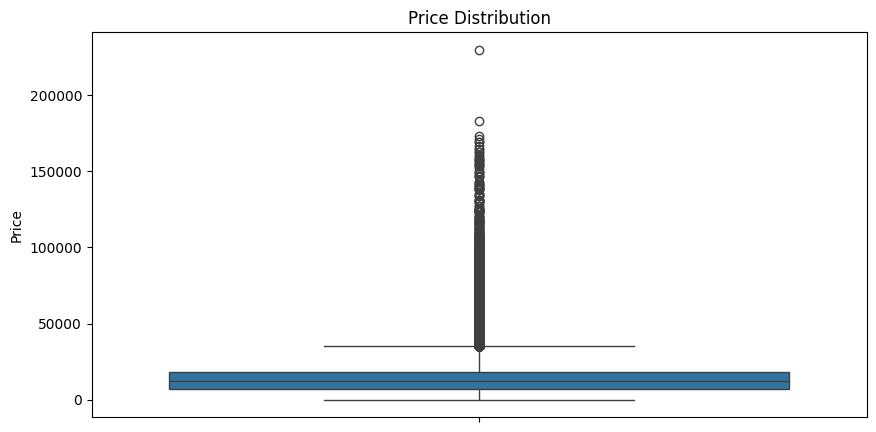

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(y=data['sellingprice'])
plt.title('Price Distribution')
plt.ylabel('Price')
plt.show()

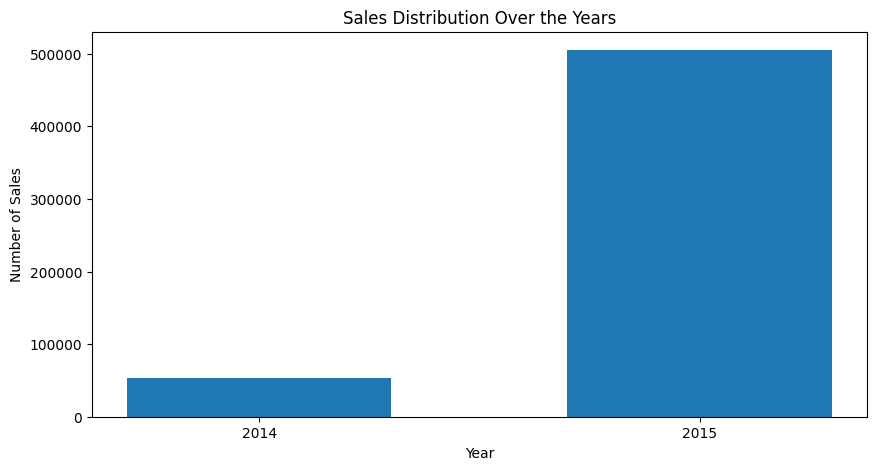

In [7]:
# Ensure 'date_of_sale' is in datetime format
data['date of sale'] = pd.to_datetime(data['date of sale'], errors='coerce')

# Extract year from 'date_of_sale' and drop NaT values
data['year'] = data['date of sale'].dt.year

# Drop rows with NaN values in 'year'
data = data.dropna(subset=['year'])

# Convert year to integer
data['year'] = data['year'].astype(int)

# Count occurrences of each year
sales_count = data['year'].value_counts().sort_index()

# Plot histogram for sales over the years
plt.figure(figsize=(10, 5))
plt.bar(sales_count.index, sales_count.values, width=0.6)  # Adjust width for better spacing
plt.title('Sales Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(sales_count.index)  # Set x-ticks to display years correctly
plt.show()

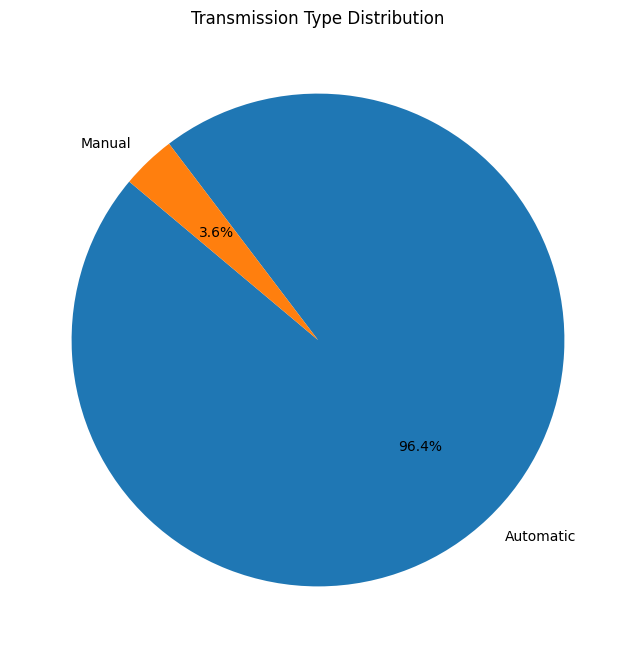

In [8]:
# Get the counts of each unique value in the 'transmission' column
transmission_counts = data['transmission'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Type Distribution')
plt.show()

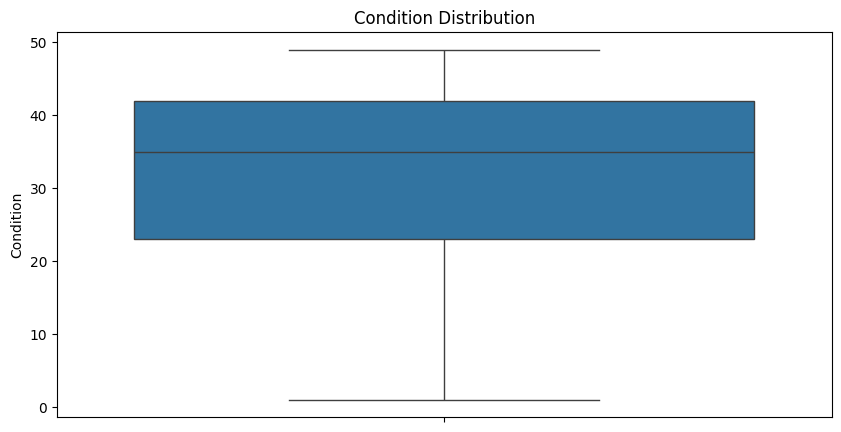

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['condition'])
plt.title('Condition Distribution')
plt.ylabel('Condition')
plt.show()

In [10]:
numerical_columns = ['year','condition','odometer','mmr','sellingprice']
df_numerical = data[numerical_columns]
correlation_matrix = df_numerical.corr()
print(correlation_matrix)

                  year  condition  odometer       mmr  sellingprice
year          1.000000   0.021515 -0.086393  0.073242      0.076988
condition     0.021515   1.000000 -0.318200  0.281415      0.321944
odometer     -0.086393  -0.318200  1.000000 -0.588113     -0.582415
mmr           0.073242   0.281415 -0.588113  1.000000      0.983635
sellingprice  0.076988   0.321944 -0.582415  0.983635      1.000000


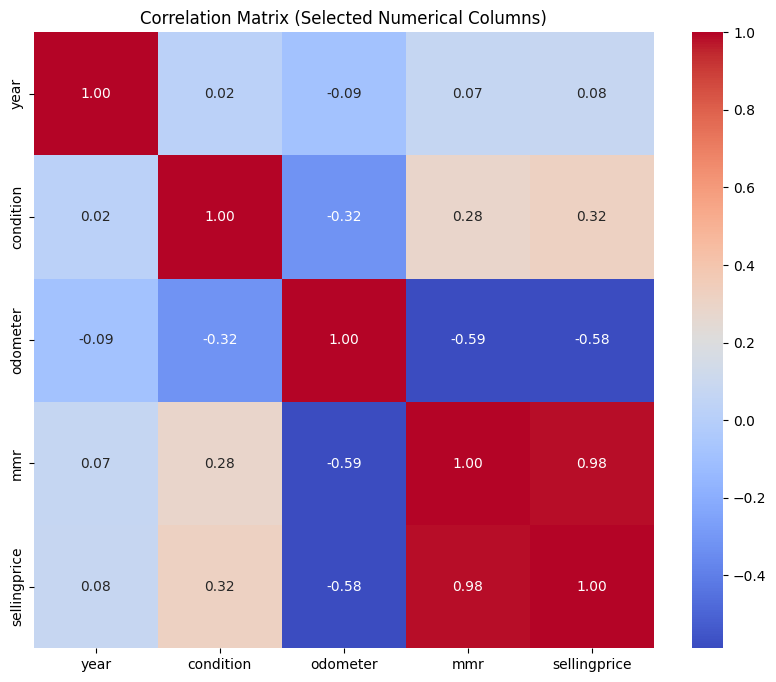

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Selected Numerical Columns)')
plt.show()

# Preparing data for prediction

In [12]:
data["transmission"].unique()

array(['Automatic', nan, 'Manual'], dtype=object)

In [13]:
# Fill NaNs with a placeholder value to indicate missing category
data['transmission'] = data['transmission'].fillna('unknown')

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['transmission'], prefix='transmission')

In [14]:
data.head()

,year,make,model,trim,body,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,date of sale,transmission_Automatic,transmission_Manual,transmission_unknown
0,2014,Kia,Sorento,LX,Suv,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16,True,False,False
1,2014,Kia,Sorento,LX,Suv,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16,True,False,False
2,2015,Bmw,3 Series,328i SULEV,Sedan,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-15,True,False,False
3,2015,Volvo,S60,T5,Sedan,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015-01-29,True,False,False
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014-12-18,True,False,False
